<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
# get matplot to show charts inline
%matplotlib inline

chrome://settings/content/cookies

NOTE: Make sure third party cookies are not blocked.

In [3]:
df = pd.read_csv("../../DATA/Employee-attrition.csv")

In [4]:
df.head(10)

,EmployeeID,recorddate_key,birthdate_key,orighiredate_key,terminationdate_key,age,length_of_service,city_name,department_name,job_title,store_name,gender_short,gender_full,termreason_desc,termtype_desc,STATUS_YEAR,STATUS,BUSINESS_UNIT
0,1318,12/31/2006 0:00,1/3/1954,8/28/1989,1/1/1900,52,17,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2006,ACTIVE,HEADOFFICE
1,1318,12/31/2007 0:00,1/3/1954,8/28/1989,1/1/1900,53,18,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2007,ACTIVE,HEADOFFICE
2,1318,12/31/2008 0:00,1/3/1954,8/28/1989,1/1/1900,54,19,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2008,ACTIVE,HEADOFFICE
3,1318,12/31/2009 0:00,1/3/1954,8/28/1989,1/1/1900,55,20,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2009,ACTIVE,HEADOFFICE
4,1318,12/31/2010 0:00,1/3/1954,8/28/1989,1/1/1900,56,21,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2010,ACTIVE,HEADOFFICE
5,1318,12/31/2011 0:00,1/3/1954,8/28/1989,1/1/1900,57,22,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2011,ACTIVE,HEADOFFICE
6,1318,12/31/2012 0:00,1/3/1954,8/28/1989,1/1/1900,58,23,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2012,ACTIVE,HEADOFFICE
7,1318,12/31/2013 0:00,1/3/1954,8/28/1989,1/1/1900,59,24,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2013,ACTIVE,HEADOFFICE
8,1318,12/31/2014 0:00,1/3/1954,8/28/1989,1/1/1900,60,25,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2014,ACTIVE,HEADOFFICE
9,1318,12/31/2015 0:00,1/3/1954,8/28/1989,1/1/1900,61,26,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2015,ACTIVE,HEADOFFICE


In [5]:
df.tail()

,EmployeeID,recorddate_key,birthdate_key,orighiredate_key,terminationdate_key,age,length_of_service,city_name,department_name,job_title,store_name,gender_short,gender_full,termreason_desc,termtype_desc,STATUS_YEAR,STATUS,BUSINESS_UNIT
49648,8258,12/1/2015 0:00,5/28/1994,8/19/2013,12/30/2015,21,2,Valemount,Dairy,Dairy Person,34,M,Male,Layoff,Involuntary,2015,TERMINATED,STORES
49649,8264,8/1/2013 0:00,6/13/1994,8/27/2013,8/30/2013,19,0,Vancouver,Customer Service,Cashier,44,F,Female,Resignaton,Voluntary,2013,TERMINATED,STORES
49650,8279,12/1/2015 0:00,7/18/1994,9/15/2013,12/30/2015,21,2,White Rock,Customer Service,Cashier,39,F,Female,Layoff,Involuntary,2015,TERMINATED,STORES
49651,8296,12/1/2013 0:00,9/2/1994,10/9/2013,12/31/2013,19,0,Kelowna,Customer Service,Cashier,16,F,Female,Resignaton,Voluntary,2013,TERMINATED,STORES
49652,8321,12/1/2014 0:00,11/28/1994,11/24/2013,12/30/2014,20,1,Grand Forks,Customer Service,Cashier,13,F,Female,Layoff,Involuntary,2014,TERMINATED,STORES


# Accessing the main DataFrame components

In [6]:
columns = df.columns
index = df.index
data = df.values  # error

In [7]:
columns

Index(['EmployeeID', 'recorddate_key', 'birthdate_key', 'orighiredate_key',
       'terminationdate_key', 'age', 'length_of_service', 'city_name',
       'department_name', 'job_title', 'store_name', 'gender_short',
       'gender_full', 'termreason_desc', 'termtype_desc', 'STATUS_YEAR',
       'STATUS', 'BUSINESS_UNIT'],
      dtype='object')

In [8]:
index

RangeIndex(start=0, stop=49653, step=1)

In [9]:
data

array([[1318, '12/31/2006 0:00', '1/3/1954', ..., 2006, 'ACTIVE',
        'HEADOFFICE'],
       [1318, '12/31/2007 0:00', '1/3/1954', ..., 2007, 'ACTIVE',
        'HEADOFFICE'],
       [1318, '12/31/2008 0:00', '1/3/1954', ..., 2008, 'ACTIVE',
        'HEADOFFICE'],
       ...,
       [8279, '12/1/2015 0:00', '7/18/1994', ..., 2015, 'TERMINATED',
        'STORES'],
       [8296, '12/1/2013 0:00', '9/2/1994', ..., 2013, 'TERMINATED',
        'STORES'],
       [8321, '12/1/2014 0:00', '11/28/1994', ..., 2014, 'TERMINATED',
        'STORES']], dtype=object)

# 1. Understanding Data Types

#### 1.A Find the shape of the dataframe

In [10]:
df.shape[1]    # pritn (f' This raw data has { df.shape[]} rows ,and {df.shape[1]} colums')

18

#### 1.B Find the data types of the dataframe

In [7]:
df.dtypes 

EmployeeID              int64
recorddate_key         object
birthdate_key          object
orighiredate_key       object
terminationdate_key    object
age                     int64
length_of_service       int64
city_name              object
department_name        object
job_title              object
store_name              int64
gender_short           object
gender_full            object
termreason_desc        object
termtype_desc          object
STATUS_YEAR             int64
STATUS                 object
BUSINESS_UNIT          object
dtype: object

In [ ]:
# changing datatype
#   df.age.astype('str')

#### 1.C Find the number of data types in the dataframe



```
Expected Output:
int64      5
object    13
dtype: int64
```



In [11]:
df.dtypes.value_counts()                     # chain method 

object    13
int64      5
Name: count, dtype: int64

#### 1.D Use Info

Use info and explore the difference.

In [9]:
df.info()                                   # all information about the data 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49653 entries, 0 to 49652
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   EmployeeID           49653 non-null  int64 
 1   recorddate_key       49653 non-null  object
 2   birthdate_key        49653 non-null  object
 3   orighiredate_key     49653 non-null  object
 4   terminationdate_key  49653 non-null  object
 5   age                  49653 non-null  int64 
 6   length_of_service    49653 non-null  int64 
 7   city_name            49653 non-null  object
 8   department_name      49653 non-null  object
 9   job_title            49653 non-null  object
 10  store_name           49653 non-null  int64 
 11  gender_short         49653 non-null  object
 12  gender_full          49653 non-null  object
 13  termreason_desc      49653 non-null  object
 14  termtype_desc        49653 non-null  object
 15  STATUS_YEAR          49653 non-null  int64 
 16  STAT

In [10]:
df.describe() # shows numeric values int and float 

,EmployeeID,age,length_of_service,store_name,STATUS_YEAR
count,49653.000000,49653.000000,49653.000000,49653.000000,49653.000000
mean,4859.495740,42.077035,10.434596,27.297605,2010.612612
std,1826.571142,12.427257,6.325286,13.514134,2.845577
min,1318.000000,19.000000,0.000000,1.000000,2006.000000
25%,3360.000000,31.000000,5.000000,16.000000,2008.000000
50%,5031.000000,42.000000,10.000000,28.000000,2011.000000
75%,6335.000000,53.000000,15.000000,42.000000,2013.000000
max,8336.000000,65.000000,26.000000,46.000000,2015.000000


# 2. Selecting Column in Data Frame

#### 2.A Check Values of the `job_title` column

In [12]:
df['job_title'].head()

0    CEO
1    CEO
2    CEO
3    CEO
4    CEO
Name: job_title, dtype: object

In [13]:
df.job_title.head()

0    CEO
1    CEO
2    CEO
3    CEO
4    CEO
Name: job_title, dtype: object

#### 2.B Find how many rows are in each job title



```
# Expected Output
Meat Cutter                        9984
Dairy Person                       8590
Produce Clerk                      8237
.
.
.
```



In [15]:
df['job_title'].value_counts()

job_title
Meat Cutter                        9984
Dairy Person                       8590
Produce Clerk                      8237
Baker                              8096
Cashier                            6816
Shelf Stocker                      5622
Customer Service Manager            306
Processed Foods Manager             289
Bakery Manager                      285
Meats Manager                       285
Produce Manager                     278
Store Manager                       271
Recruiter                            62
HRIS Analyst                         55
Accounting Clerk                     50
Benefits Admin                       35
Labor Relations Analyst              30
Accounts Receiveable Clerk           30
Trainer                              26
Accounts Payable Clerk               25
Auditor                              20
Systems Analyst                      20
Investment Analyst                   20
Compensation Analyst                 20
Corporate Lawyer              

In [14]:
 # df.job_title.value_counts().head()    # code can be like this  + .head() for top 5 

#### 2.C [BONUS] Write a function to count the number of rows


```
def row_count(column_name):
    number_of_rows = 0
    return number_of_rows
```



In [29]:
def row_count(df,column_name ):
 return len (df[colum_name])

#### 2.D Describe `age`

Find the count, mean, std, min, max of the column 'age'

In [30]:
df.age.describe()


count    49653.000000
mean        42.077035
std         12.427257
min         19.000000
25%         31.000000
50%         42.000000
75%         53.000000
max         65.000000
Name: age, dtype: float64

In [14]:
df[['department_name', 'age',]]# write in others 

,department_name,age
0,Executive,52
1,Executive,53
2,Executive,54
3,Executive,55
4,Executive,56
...,...,...
49648,Dairy,21
49649,Customer Service,19
49650,Customer Service,21
49651,Customer Service,19


In [15]:
df['age']

0        52
1        53
2        54
3        55
4        56
         ..
49648    21
49649    19
49650    21
49651    19
49652    20
Name: age, Length: 49653, dtype: int64

##### 2.E [BONUS] Describe all numeric columns of the dataframe

Find the count, mean, std, min, max of all columns of the dataframe

In [39]:
df.describe().T  # mode 

,count,mean,std,min,25%,50%,75%,max
age,49653.0,42.077035,12.427257,19.0,31.0,42.0,53.0,65.0
length_of_service,49653.0,10.434596,6.325286,0.0,5.0,10.0,15.0,26.0
store_name,49653.0,27.297605,13.514134,1.0,16.0,28.0,42.0,46.0
STATUS_YEAR,49653.0,2010.612612,2.845577,2006.0,2008.0,2011.0,2013.0,2015.0


# 3. Make the index meaningful by making `EmployeeID` the index

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 49653 entries, 1318 to 8321
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   recorddate_key       49653 non-null  object
 1   birthdate_key        49653 non-null  object
 2   orighiredate_key     49653 non-null  object
 3   terminationdate_key  49653 non-null  object
 4   age                  49653 non-null  int64 
 5   length_of_service    49653 non-null  int64 
 6   city_name            49653 non-null  object
 7   department_name      49653 non-null  object
 8   job_title            49653 non-null  object
 9   store_name           49653 non-null  int64 
 10  gender_short         49653 non-null  object
 11  gender_full          49653 non-null  object
 12  termreason_desc      49653 non-null  object
 13  termtype_desc        49653 non-null  object
 14  STATUS_YEAR          49653 non-null  int64 
 15  STATUS               49653 non-null  object
 16  BUSINES

In [64]:
print (df.index)

Index([1318, 1318, 1318, 1318, 1318, 1318, 1318, 1318, 1318, 1318,
       ...
       8188, 8214, 8223, 8226, 8231, 8258, 8264, 8279, 8296, 8321],
      dtype='int64', name='EmployeeID', length=49653)


In [71]:
df.set_index('EmployeeID')

KeyError: "None of ['EmployeeID'] are in the columns"

3.A Find a specific row using the index

In [70]:
print ('df.loc["1318]',df.loc [8188])  

df.loc["1318]              recorddate_key birthdate_key orighiredate_key  \
EmployeeID                                                   
8188        12/31/2013 0:00    10/22/1993        4/25/2013   
8188         10/1/2014 0:00    10/22/1993        4/25/2013   

           terminationdate_key  age  length_of_service city_name  \
EmployeeID                                                         
8188                10/25/2014   20                  0  Victoria   
8188                10/25/2014   21                  1  Victoria   

             department_name job_title  store_name gender_short gender_full  \
EmployeeID                                                                    
8188        Customer Service   Cashier          46            F      Female   
8188        Customer Service   Cashier          46            F      Female   

           termreason_desc   termtype_desc  STATUS_YEAR      STATUS  \
EmployeeID                                                            
8188 

#### 3.B Sort the dataframe using the index

In [47]:
df.iloc[2]  #df.iloc[2,4]

recorddate_key         12/31/2008 0:00
birthdate_key                 1/3/1954
orighiredate_key             8/28/1989
terminationdate_key           1/1/1900
age                                 54
length_of_service                   19
city_name                    Vancouver
department_name              Executive
job_title                          CEO
store_name                          35
gender_short                         M
gender_full                       Male
termreason_desc         Not Applicable
termtype_desc           Not Applicable
STATUS_YEAR                       2008
STATUS                          ACTIVE
BUSINESS_UNIT               HEADOFFICE
Name: 1318, dtype: object

#  .loc[]  for name of the index

# .iloc []  for array location index 

In [48]:
df.sort_index(ascending=False)

,recorddate_key,birthdate_key,orighiredate_key,terminationdate_key,age,length_of_service,city_name,department_name,job_title,store_name,gender_short,gender_full,termreason_desc,termtype_desc,STATUS_YEAR,STATUS,BUSINESS_UNIT
EmployeeID,,,,,,,,,,,,,,,,,
8336,12/31/2015 0:00,12/31/1994,12/11/2013,1/1/1900,21,2,Vancouver,Dairy,Dairy Person,35,M,Male,Not Applicable,Not Applicable,2015,ACTIVE,STORES
8336,12/31/2014 0:00,12/31/1994,12/11/2013,1/1/1900,20,1,Vancouver,Dairy,Dairy Person,35,M,Male,Not Applicable,Not Applicable,2014,ACTIVE,STORES
8336,12/31/2013 0:00,12/31/1994,12/11/2013,1/1/1900,19,0,Vancouver,Dairy,Dairy Person,35,M,Male,Not Applicable,Not Applicable,2013,ACTIVE,STORES
8335,12/31/2015 0:00,12/28/1994,12/10/2013,1/1/1900,21,2,Vancouver,Dairy,Dairy Person,35,F,Female,Not Applicable,Not Applicable,2015,ACTIVE,STORES
8335,12/31/2014 0:00,12/28/1994,12/10/2013,1/1/1900,20,1,Vancouver,Dairy,Dairy Person,35,F,Female,Not Applicable,Not Applicable,2014,ACTIVE,STORES
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1318,12/31/2011 0:00,1/3/1954,8/28/1989,1/1/1900,57,22,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2011,ACTIVE,HEADOFFICE
1318,12/31/2010 0:00,1/3/1954,8/28/1989,1/1/1900,56,21,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2010,ACTIVE,HEADOFFICE
1318,12/31/2009 0:00,1/3/1954,8/28/1989,1/1/1900,55,20,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2009,ACTIVE,HEADOFFICE


In [84]:
df.sort_value('age',ascending= False)

AttributeError: 'DataFrame' object has no attribute 'sort_value'

#### 3.C [BONUS] Sort the dataframe using `age`

In [73]:
df.sort_values('age') 

,recorddate_key,birthdate_key,orighiredate_key,terminationdate_key,age,length_of_service,city_name,department_name,job_title,store_name,gender_short,gender_full,termreason_desc,termtype_desc,STATUS_YEAR,STATUS,BUSINESS_UNIT
EmployeeID,,,,,,,,,,,,,,,,,
8325,12/31/2013 0:00,12/7/1994,11/29/2013,1/1/1900,19,0,Cranbrook,Customer Service,Cashier,8,M,Male,Not Applicable,Not Applicable,2013,ACTIVE,STORES
8253,12/31/2013 0:00,5/15/1994,8/12/2013,1/1/1900,19,0,North Vancouver,Customer Service,Cashier,22,F,Female,Not Applicable,Not Applicable,2013,ACTIVE,STORES
8252,12/31/2013 0:00,5/10/1994,8/9/2013,1/1/1900,19,0,Victoria,Customer Service,Cashier,46,F,Female,Not Applicable,Not Applicable,2013,ACTIVE,STORES
8251,12/31/2013 0:00,5/7/1994,8/7/2013,1/1/1900,19,0,Vancouver,Customer Service,Cashier,44,F,Female,Not Applicable,Not Applicable,2013,ACTIVE,STORES
8250,12/31/2013 0:00,4/26/1994,8/2/2013,1/1/1900,19,0,Burnaby,Dairy,Dairy Person,5,F,Female,Not Applicable,Not Applicable,2013,ACTIVE,STORES
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3262,8/1/2008 0:00,8/23/1943,2/28/1995,8/23/2008,65,13,Nanaimo,Meats,Meat Cutter,18,F,Female,Retirement,Voluntary,2008,TERMINATED,STORES
3248,8/1/2008 0:00,8/14/1943,2/19/1995,8/14/2008,65,13,Vancouver,Dairy,Dairy Person,35,F,Female,Retirement,Voluntary,2008,TERMINATED,STORES
4948,7/1/2013 0:00,7/9/1948,1/14/2000,7/9/2013,65,13,Burnaby,Produce,Produce Clerk,5,F,Female,Retirement,Voluntary,2013,TERMINATED,STORES


In [ ]:
# inplace = true - meaning saving 

#### 3.D [BONUS] Using `sample` select any row

In [74]:
df.sample(10)  # number is the randomly assign sample not in order.

,recorddate_key,birthdate_key,orighiredate_key,terminationdate_key,age,length_of_service,city_name,department_name,job_title,store_name,gender_short,gender_full,termreason_desc,termtype_desc,STATUS_YEAR,STATUS,BUSINESS_UNIT
EmployeeID,,,,,,,,,,,,,,,,,
3833,12/31/2010 0:00,6/13/1962,10/3/1996,1/1/1900,48,14,Terrace,Produce,Produce Clerk,32,M,Male,Not Applicable,Not Applicable,2010,ACTIVE,STORES
2585,12/31/2015 0:00,1/19/1956,5/18/1993,1/1/1900,59,22,Chilliwack,Meats,Meat Cutter,6,M,Male,Not Applicable,Not Applicable,2015,ACTIVE,STORES
6458,12/31/2008 0:00,7/17/1980,4/23/2006,1/1/1900,28,2,Vancouver,Processed Foods,Shelf Stocker,43,M,Male,Not Applicable,Not Applicable,2008,ACTIVE,STORES
2574,12/31/2013 0:00,1/10/1956,5/13/1993,1/1/1900,57,20,Nanaimo,Meats,Meat Cutter,18,M,Male,Not Applicable,Not Applicable,2013,ACTIVE,STORES
2036,12/31/2006 0:00,12/31/1952,10/7/1991,1/1/1900,54,15,Burnaby,Meats,Meat Cutter,5,M,Male,Not Applicable,Not Applicable,2006,ACTIVE,STORES
7226,12/31/2012 0:00,7/10/1986,6/20/2009,1/1/1900,26,3,Nanaimo,Customer Service,Cashier,18,F,Female,Not Applicable,Not Applicable,2012,ACTIVE,STORES
7326,12/31/2013 0:00,3/27/1987,11/5/2009,1/1/1900,26,4,Kamloops,Processed Foods,Shelf Stocker,15,M,Male,Not Applicable,Not Applicable,2013,ACTIVE,STORES
5344,12/31/2015 0:00,6/20/1971,7/8/2001,1/1/1900,44,14,Trail,Bakery,Baker,33,F,Female,Not Applicable,Not Applicable,2015,ACTIVE,STORES
2277,12/31/2007 0:00,5/3/1954,6/21/1992,1/1/1900,53,15,Vernon,Meats,Meat Cutter,36,M,Male,Not Applicable,Not Applicable,2007,ACTIVE,STORES


# 4. Query Data Frame

#### 4.A Find rows Where `job_title` is CEO

In [85]:
df.loc[df.job_litle=='CEO'].head()

AttributeError: 'DataFrame' object has no attribute 'job_litle'

In [81]:
 #   df.loc[(df[ 'length_of_service '] == 17 ) &  

#### 4.B Group by `age` and find how many there are of each age

In [30]:
df.groupby('city_name', as_index= False) .age.mean().sort_values(by='age', ascending =False)

,city_name,age
22,Ocean Falls,51.307692
9,Dease Lake,46.000000
24,Port Coquitlam,44.511927
8,Dawson Creek,43.961240
37,West Vancouver,43.949429
31,Terrace,43.708469
29,Squamish,43.440447
16,Langley,43.355161
35,Vernon,42.983296
27,Quesnel,42.960171


# 5. Visualisation


#### 5.A Plot a histogram of age

In [31]:
df.age
df['age']

EmployeeID
1318    52
1318    53
1318    54
1318    55
1318    56
        ..
8258    21
8264    19
8279    21
8296    19
8321    20
Name: age, Length: 49653, dtype: int64

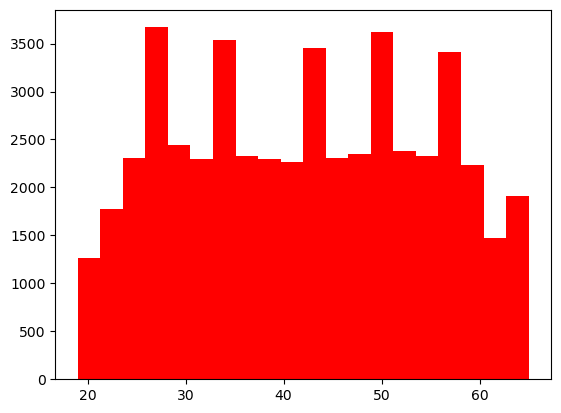

In [33]:
num_bins = 20
n,bins,patches = plt.hist (df['age'], num_bins, facecolor ='red' ,alpha= 1)

#### 5.B BoxPlot of `age`

ValueError: keyword grid_b is not recognized; valid keywords are ['size', 'width', 'color', 'tickdir', 'pad', 'labelsize', 'labelcolor', 'zorder', 'gridOn', 'tick1On', 'tick2On', 'label1On', 'label2On', 'length', 'direction', 'left', 'bottom', 'right', 'top', 'labelleft', 'labelbottom', 'labelright', 'labeltop', 'labelrotation', 'grid_agg_filter', 'grid_alpha', 'grid_animated', 'grid_antialiased', 'grid_clip_box', 'grid_clip_on', 'grid_clip_path', 'grid_color', 'grid_dash_capstyle', 'grid_dash_joinstyle', 'grid_dashes', 'grid_data', 'grid_drawstyle', 'grid_figure', 'grid_fillstyle', 'grid_gapcolor', 'grid_gid', 'grid_in_layout', 'grid_label', 'grid_linestyle', 'grid_linewidth', 'grid_marker', 'grid_markeredgecolor', 'grid_markeredgewidth', 'grid_markerfacecolor', 'grid_markerfacecoloralt', 'grid_markersize', 'grid_markevery', 'grid_mouseover', 'grid_path_effects', 'grid_picker', 'grid_pickradius', 'grid_rasterized', 'grid_sketch_params', 'grid_snap', 'grid_solid_capstyle', 'grid_solid_joinstyle', 'grid_transform', 'grid_url', 'grid_visible', 'grid_xdata', 'grid_ydata', 'grid_zorder', 'grid_aa', 'grid_c', 'grid_ds', 'grid_ls', 'grid_lw', 'grid_mec', 'grid_mew', 'grid_mfc', 'grid_mfcalt', 'grid_ms']

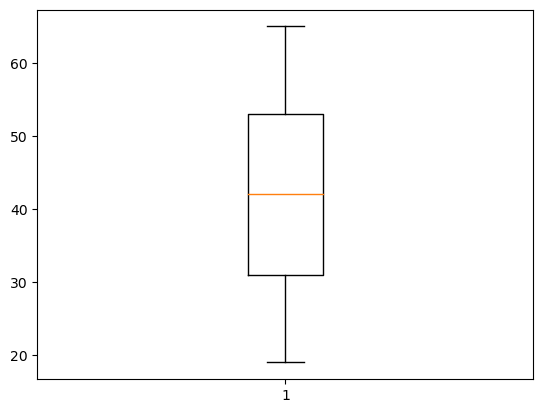

In [86]:
plt.boxplot(df.age)
plt.yscale('linear')
plt.grid(b=True,which='major',color='b',linestyle='-')
plt.grit(b=True,which='minor',color='r',linestyle='--')
plt.show()

#### 5.C Create a scatterplot of `age` and `length_of_service`

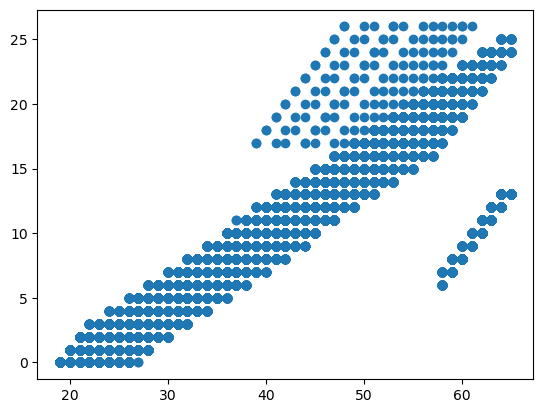

In [90]:
plt.scatter(df.age,df.length_of_service)
plt.show()

#### 5.D Print a statistical summary of `age`

In [89]:
print('statistical summary of observations =', stats.decribe(df.age))

AttributeError: module 'scipy.stats' has no attribute 'decribe'



---



---



> > > > > > > > > © 2023 Institute of Data


---



---





In [88]:
df.job_title.value_counts().head()    # top number 

job_title
Meat Cutter      9984
Dairy Person     8590
Produce Clerk    8237
Baker            8096
Cashier          6816
Name: count, dtype: int64